# Задание 2

Рассматривается система, аналогичная **задаче №1**, но в которой возможна организация ремонта ранее вышедших из строя устройств. Одновременно может ремонтироваться только одно устройство. Если подлежат ремонту устройства разных типов, приоритет отдаётся тем, которых сломалось больше, а если их сломалось одинаковое число – тому типу, интенсивность поломок которого выше. Интенсивность ремонта устройств обоих типов одинакова и равна $\lambda_S = (N_A + N_B - (G mod 3)) * (G + (N mod 4)) = 20$.

Требуется:
 1. [x] нарисовать граф состояний системы;
 2. [x] составить матрицу интенсивностей переходов;
 3. [x] записать алгебраические уравнения Колмогорова для установившегося режима работы;
 4. [x] рассчитать предельные вероятности состояний системы;
 5. [x] рассчитать математические ожидания прикладных характеристик системы: 

 - [x] вероятности отказа системы;
 - [x] числа готовых к эксплуатации устройств каждого типа;
 - [x] коэффициента загрузки ремонтной службы.
 

 6. [x] записать дифференциальные уравнения Колмогорова;
 7. [x] методами численного интегрирования решить полученную систему уравнений, исходя из того, что в начальный момент времени все устройства исправны, а время моделирования выбирается вдвое больше теоретической оценки времени переходного процесса (т.е. того времени, которое необходимо, чтобы эвклидова норма вектора невязки с ранее рассчитанным предельным вектором составляла не более 10% эвклидовой нормы последнего);
 8. [x] построить графики вероятностей нахождения системы в каждом из возможных состояний с течением времени;
 9. [ ] провести имитационное моделирование системы в терминах непрерывных марковских цепей 100 раз, время моделирования выбирается вдвое больше экспериментальной оценки времени переходного процесса (т.е. того времени, которое необходимо, чтобы накопленная доля времени пребывания системы в каждом из состояний отличалась не более чем на 10% от результатов, полученных при обработке предыдущего переключения цепи), проанализировать статистику времени выхода на установившийся режим работы и рассчитать статистические оценки предельных вероятностей после выхода на установившийся режим;
 10. [ ] провести имитационное моделирование системы в терминах дискретно-событийного моделирования (с независимым планированием времени наступления событий для каждого устройства в отдельности) 100 раз, время моделирования выбирается вдвое больше экспериментальной оценки времени переходного процесса (т.е. того времени, которое необходимо, чтобы накопленные средние оценки прикладных характеристик системы отличалась не более чем на 10% от результатов, полученных при обработке предыдущего события в системе), проанализировать статистику времени выхода на установившийся режим работы и рассчитать статистические оценки для прикладных характеристик системы после выхода на установившийся режим.



In [1]:
# Подключение библиотек
import scipy as sc
import math
import numpy as np
import seaborn as sb
import csv
import pandas as pd
import random
import matplotlib.pyplot as plt
from sympy import symbols, dsolve, Function, Eq, integrate, oo

# 1. Граф состояний системы

$S^{ij}_{kl}$ - состояние в графе, 

$i$ - исправно работающие устройства типа A, 

$j$ - резервные устройства типа A, 

$k$ -  исправно работающие устройства типа B,

$l$ - резервные устройства типа B.

Строим граф состояний системы как для СМО.

![gr22](src/smo3.png)

# 2. Матрица состояний переходов

Второй этап — составление матрицы интенсивностей переходов ($Q$). Она представляет собой квадратную матрицу размерностью n x n, где n – число вершин в графе состояний марковской системы. Матрица составляется по следующему алгоритму. Выбирается одно состояние (номер этого состояния ($i$) будет соответствовать номеру строки в матрице). Затем следует определить сумму выходящих потоков, т.е. сумму весов всех выходящих из $i$-ой вершины дуг. Эта величина записывается в ячейку $Q(i,i)$. Затем следует проанализировать все дуги, входящие $i$-ую в вершину. Если дуга входит в $i$-ую в вершину из вершины $j$, то вес дуги записывается в ячейку матрица $Q(i,j)$.

Диагональные элементы матрицы состояний переходов определяются из условия:
$\sum^n_{j = 1}q_{ij} = 0$, откуда $q_{ii} = -\sum^n_{j = 1, i \neq j}q_{ij}$.

$\lambda_1 = 2\lambda_A + 3\lambda_B + \lambda_S = 34$

$\lambda_2 = 2\lambda_A + 3\lambda_B = 14$

$\lambda_3 = \lambda_S + \lambda_A + 3\lambda_B = 33$

$\lambda_A = 1$

$\lambda_B = 4$

$\lambda_S = 20$


$ Q = \begin{bmatrix}
-\lambda_2&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&0  \\
\lambda_S&-\lambda_1&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
\lambda_S&0&-\lambda_1&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0&0&0&0&0 \\
0&\lambda_S&0&-\lambda_1&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0&0&0 \\
0&\lambda_S&0&0&-\lambda_1&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0&0 \\
0&0&\lambda_S&0&0&-\lambda_1&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0&0&0&0 \\
0&0&0&\lambda_S&0&0&-\lambda_3&0&0&0&\lambda_A&3\lambda_B&0&0&0&0&0&0&0 \\
0&0&0&0&\lambda_S&0&0&-\lambda_1&0&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0&0 \\
0&0&0&0&\lambda_S&0&0&0&-\lambda_1&0&0&0&2\lambda_A&3\lambda_B&0&0&0&0&0 \\
0&0&0&0&0&\lambda_S&0&0&0&-\lambda_S&0&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&\lambda_S&0&0&0&-\lambda_S&0&0&0&0&0&0&0&0 \\
0&0&0&0&0&0&0&\lambda_S&0&0&0&-\lambda_3&0&0&\lambda_A&3\lambda_B&0&0&0 \\
0&0&0&0&0&0&0&\lambda_S&0&0&0&0&-\lambda_1&0&0&2\lambda_A&3\lambda_B&0&0 \\
0&0&0&0&0&0&0&0&\lambda_S&0&0&0&0&-\lambda_S&0&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&\lambda_S&0&0&-\lambda_S&0&0&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&\lambda_S&0&0&-\lambda_3&0&\lambda_A&3\lambda_B \\
0&0&0&0&0&0&0&0&0&0&0&0&\lambda_S&0&0&0&-\lambda_S&0&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\lambda_S&0&-\lambda_S&0 \\
0&0&0&0&0&0&0&0&0&0&0&0&0&0&0&\lambda_S&0&0&-\lambda_S 
\end{bmatrix} $

In [2]:
l1 = 34
l2 = 14
l3 = 33

la = 1
lb = 4
ls = 20


Q = np.array([-l2,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
               ls, -l1,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
               ls,   0, -l1,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,  ls,   0, -l1,   0,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,  ls,   0,   0, -l1,   0,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,  ls,   0,   0, -l1,   0,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,  ls,   0,   0, -l3,   0,   0,   0,   la,  3*lb,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,  ls,   0,   0, -l1,   0,   0,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,  ls,   0,   0,   0, -l1,   0,   0,   0,  2*la,  3*lb,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,  ls,   0,   0,   0, -ls,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,  ls,   0,   0,   0, -ls,   0,   0,   0,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,  ls,   0,   0,   0, -l3,   0,   0,   la,  3*lb,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,  ls,   0,   0,   0,   0, -l1,   0,   0,  2*la,  3*lb,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,  ls,   0,   0,   0,   0, -ls,   0,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  ls,   0,   0, -ls,   0,   0,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  ls,   0,   0, -l3,   0,   la,  3*lb,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  ls,   0,   0,   0, -ls,   0,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  ls,   0, -ls,   0,
                0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  ls,   0,   0,  -ls,]).reshape(19, 19)

In [3]:
# Транспонирование матрицы состояний переходов 
# для использования при решении системы dp/dt = Q^T * p
Q_T = Q.T

# 3. Алгебраические уравнения Колмогорова для установившегося режима работы

Ссылка для понимания: https://www.hse.ru/mirror/pubs/share/182481937 , https://books.ifmo.ru/file/pdf/471.pdf , https://math.semestr.ru/cmo/kolmogorov.php

Система $P' = Q^TP$

Система дифференциальных уравнений марковского случайного процесса, которая при заданных начальных условиях $P = \{p_1(0),..., p_n(0)\}$ позволяет выполнить исследование нестационарного (переходного) режима работы моделируемой системы путем расчета вероятностей состояний марковского процесса в произвольный момент времени $t > 0$:

$\frac{dp_j(t)}{dt} = \sum^n_{i = 1}p_i(t)q_{ij}, (j = 1, n)$

Особенность решения дифференциальных уравнений вообще состоит в том, что требуется задать так называемые начальные условия, т.е. в данном, случае вероятности состояний системы в начальный момент $t = 0$. Так, например, систему уравнений естественно решать при условии, что в начальный момент оба узла исправны и система находилась в состоянии $S_0$, т.е. при начальных условиях $p_0(0)=1, p_1(0)=0,...,p_n(0)=0 $. 
Уравнения Колмогорова дают возможность найти все вероятности состояний как функции времени. Особый интерес представляют вероятности системы $p_i(t)$ в **предельном стационарном режиме**, т.е. при $t \rightarrow \infty$, которые называются предельными (или финальными) вероятностями состояний. 
В теории случайных процессов доказывается, что если число состояний системы конечно и из каждого из них можно (за конечное число шагов) перейти в любое другое состояние, то предельные вероятности существуют. 
Предельная вероятность состояния $S_i$ имеет четкий смысл: она показывает среднее относительное время пребывания системы в этом состоянии. Например, если предельная вероятность состояния $S_0$, т.е. $p_0=0.5$, то это означает, что в среднем половину времени система находится в состоянии $S_0$. 
Так как предельные вероятности постоянны, то, заменяя в уравнениях Колмогорова их производные нулевыми значениями, получим **систему линейных алгебраических уравнений**, описывающих стационарный режим. Для системы S с графом состояний, изображенном на рисунке выше, такая система уравнений имеет вид: 

$0 = -\lambda_2p_1 + \lambda_Sp_2 + \lambda_Sp_3$

$0 = -\lambda_1p_2 + 2\lambda_Ap_1 + \lambda_Sp_4 + \lambda_Sp_5$

$0 = -\lambda_1p_3 + 3\lambda_Bp_1 + \lambda_Sp_6$

$0 = -\lambda_1p_4 + 2\lambda_Ap_2 + \lambda_Sp_7$

$0 = -\lambda_1p_5 + 3\lambda_Bp_2 + 2\lambda_Ap_3 + \lambda_Sp_8 + \lambda_Sp_9$

$0 = -\lambda_1p_6 + 3\lambda_Bp_3 + \lambda_Sp_{10}$

$0 = -\lambda_3p_7 + 2\lambda_Ap_4 + \lambda_Sp_{11}$

$0 = -\lambda_1p_8 + 3\lambda_Bp_4 + 2\lambda_Ap_5 + \lambda_Sp_12 + \lambda_Sp_13$

$0 = -\lambda_1p_9 + 3\lambda_Bp_5 + 2\lambda_Ap_6 + \lambda_Sp_{14}$

$0 = -\lambda_Sp_{10} + 3\lambda_Bp_6$

$0 = -\lambda_Sp_{11} + \lambda_Ap_7$

$0 = -\lambda_3p_{12} + 3\lambda_Bp_7 + 2\lambda_Ap_8 + \lambda_Sp_{15}$

$0 = -\lambda_1p_{13} + 3\lambda_Bp_8 + 2\lambda_Ap_9 + \lambda_Sp_{16} + \lambda_Sp_{17}$

$0 = -\lambda_Sp_{14} + 3\lambda_Bp_{9}$

$0 = -\lambda_Sp_{15} + \lambda_Ap_{12}$

$0 = -\lambda_3p_{16} + 3\lambda_Bp_{12} + 2\lambda_Ap_{13} + \lambda_Sp_{18} + \lambda_Sp_{19}$

$0 = -\lambda_Sp_{17} + 3\lambda_Bp_{13}$

$0 = -\lambda_Sp_{18} + \lambda_Ap_{16}$

$0 = -\lambda_Sp_{19} + 3\lambda_Bp_{16}$


# 4. Предельные вероятности состояний системы

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  20.   0.   0. -20.]


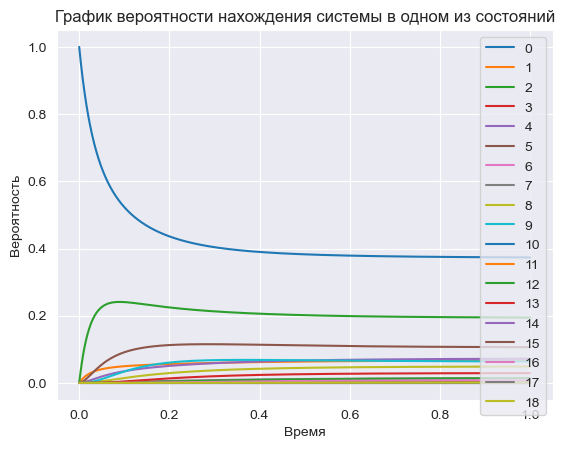

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-14.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,-34.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.0,0.0,-34.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,2.0,0.0,-34.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,2.0,0.0,-34.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,12.0,0.0,0.0,-34.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,0.0,0.0,-33.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,12.0,2.0,0.0,0.0,-34.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,-34.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,-20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# b = Q^Tx
A = np.append(Q_T,[np.ones(19)],axis=0)
A = np.delete(A, 15, axis=0)
b = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0])

pi = b.dot(Q)
print(pi)
pi2 = np.linalg.solve(A, b)

sb.set_style("darkgrid")

plt.xlabel("Время")
plt.ylabel("Вероятность")
plt.title("График вероятности нахождения системы в одном из состояний")

# Неявный метод Эйлера для решения системы
def backward_euler(u0, tau, T):
    from scipy import optimize
    N_t = int(round(T/tau))
    t = np.linspace(0, N_t*tau, N_t+1)
    u = np.zeros((N_t+1, len(u0)))
    u[0] = np.array(u0)

    def Phi(z, t, v):
        return z - tau*(Q_T @ z) - v
    
    for n in range(N_t):
        u[n+1] = optimize.fsolve(Phi, u[n], args=(t[n], u[n]))

    return u, t

u0 = np.zeros(19)
u0[0] = 1
u, t = backward_euler(u0, 1e-3, 1)

# График вероятностей переходов между состояниями
for i in range(19):
    plt.plot(t, u[:,i])
plt.legend(range(19))
plt.grid(True)
plt.show()
pd.DataFrame(A)

### Предельные вероятности

In [5]:
pd.DataFrame(pi2)

,0
0,0.372227
1,0.067118
2,0.193441
3,0.004099
4,0.072779
5,0.105513
6,0.000256
7,0.014820
8,0.049290
9,0.063308


# 5. Математические ожидания прикладных характеристик системы

 - вероятности отказа системы;
 - числа готовых к эксплуатации устройств каждого типа;
 - коэффициента загрузки ремонтной службы.

In [6]:
# Матожидание числа работоспособных устройств типа А

# plt.xlabel("Время")
# plt.ylabel("Матожидание")
# plt.title("График матожидания числа работоспособных устройств типа А")


ready_A = [(
    4*sum(u[j, i] for i in [0, 2, 5]) 
    + 3*sum(u[j, i] for i in [1, 4, 8]) 
    + 2*sum(u[j, i] for i in [3, 7, 12]) 
    + 1*sum(u[j, i] for i in [6, 11, 15])) for j in range(len(u))]
# plt.plot(t, ready_A)
# plt.show()
print("Матожидание числа работоспособных устройств типа А: ", sc.integrate.trapezoid(ready_A, x=t))

Матожидание числа работоспособных устройств типа А:  3.445658073549421


In [7]:
# plt.xlabel("Время")
# plt.ylabel("Матожидание")
# plt.title("График матожидания числа работоспособных устройств типа B")

# Матожидание числа работоспособных устройств типа В
ready_B = [(
    5*sum(u[j, i] for i in [0, 1, 3, 6]) 
    + 4*sum(u[j, i] for i in [2, 4, 7, 11])
    + 3*sum(u[j, i] for i in [5, 8, 12, 15])) for j in range(len(u))]
# plt.plot(t, ready_B)
# plt.show()
print("Матожидание числа работоспособных устройств типа B: ", sc.integrate.trapezoid(ready_B, x=t))

Матожидание числа работоспособных устройств типа B:  3.989185570052401


In [8]:
# plt.xlabel("Время")
 #plt.ylabel("Коэффициент загруженности")
# plt.title("График коэффициента загруженности ремонтной службы")


# Коэффициент загруженности ремонтной службы
repair = [(
    1*sum(u[j, i] for i in range(1, 19))) for j in range(len(u))]
# plt.plot(t, repair)
 #plt.show()
print("Коэффициент загруженности ремонтной службы: ", sc.integrate.trapezoid(repair, x=t))

Коэффициент загруженности ремонтной службы:  0.576988713644192


# Имитационное моделирование системы в терминах непрерывных марковских цепей 100 раз, время моделирования выбирается вдвое больше экспериментальной оценки времени переходного процесса (т.е. того времени, которое необходимо, чтобы накопленная доля времени пребывания системы в каждом из состояний отличалась не более чем на 10% от результатов, полученных при обработке предыдущего переключения цепи), проанализировать статистику времени выхода на установившийся режим работы и рассчитать статистические оценки предельных вероятностей после выхода на установившийся режим;

In [9]:
# Имитационное моделирование в терминах непрерывных марковских цепей
random.seed(0)
times = []
working = []
map = [[4, 5], [3, 5], [4, 4], [2, 5], [3, 4], [4, 3], [1, 5], [2, 4], [3, 3], [4, 2], [0, 5], [1, 4], [2, 3], [3, 2], [0, 4], [1, 3], [2, 2], [0, 3], [1, 2]]
for i in range(100):
    cur_time = 0
    cur_state = 0
    work_A = 0
    work_B = 0
    while cur_time < 1.0:
        dt = 1./Q[cur_state, cur_state] * math.log(random.random())
        cur_time += dt
        work_A += dt*map[cur_state][0]
        work_B += dt*map[cur_state][1]
        r = random.randrange(0, -Q[cur_state, cur_state])
    for j in range(19):
        r -= Q[cur_state, j] if cur_state != j else 0
        if r < 0:
            cur_state = j
            break
    times.append(cur_time)
    working.append([work_A, work_B])
print(np.array(working).mean(axis=0))

[4.26285417 5.32856771]


# Имитационное моделирование системы в терминах дискретно-событийного моделирования (с независимым планированием времени наступления событий для каждого устройства в отдельности) 100 раз, время моделирования выбирается вдвое больше экспериментальной оценки времени переходного процесса (т.е. того времени, которое необходимо, чтобы накопленные средние оценки прикладных характеристик системы отличалась не более чем на 10% от результатов, полученных при обработке предыдущего события в системе), проанализировать статистику времени выхода на установившийся режим работы и рассчитать статистические оценки для прикладных характеристик системы после выхода на установившийся режим.

In [10]:
# Класс устройства для имитационного моделирования в терминах дискретно-событийного моделирования
# Устройство обладает собственным потоком случайных чисел с равномерным распределением
import scipy.stats as sts

class Unit:
    def __init__(self, typeUnit='A', lambda_breakdown=5, lambda_repair=5):
        self.typeUnit = typeUnit
        self.lambda_breakdown = lambda_breakdown
        self.lambda_repair = lambda_repair


    def time_breakdown(self):
        return -1. / self.lambda_breakdown * np.log(sts.uniform.rvs(loc=0, scale=1, size=1))


    def time_repair(self):
        return -1. / self.lambda_repair * np.log(sts.uniform.rvs(loc=0, scale=1, size=1))

In [11]:
# Имитационное моделирование в терминах дискретно-событийного моделирования
np.random.seed(0)
times = []
working = []
for i in range(100):
    events = []
    units_A_working = [Unit('A', la, ls), Unit('A', la, ls)]
    units_A_stock = [Unit('A', la, ls), Unit('A', la, ls)]
    units_A_broken = []
    units_B_working = [Unit('B', lb, ls), Unit('B', lb, ls), Unit('B', lb, ls)]
    units_B_stock = [Unit('B', lb, ls), Unit('B', lb, ls)]
    units_B_broken = []
    cur_time = 0
    repairing = 0
    work_A = 0
    work_B = 0
    events.append(["Broken", units_A_working[0], units_A_working[0].time_breakdown()])
    events.append(["Broken", units_A_working[1], units_A_working[1].time_breakdown()])
    events.append(["Broken", units_B_working[0], units_B_working[0].time_breakdown()])
    events.append(["Broken", units_B_working[1], units_B_working[1].time_breakdown()])
    events.append(["Broken", units_B_working[2], units_B_working[2].time_breakdown()])
    while cur_time < 1.0:
        if len(events) == 0:
            break
        event = events[0]
        for e in events:
            if e[2] < event[2]:
                event = e
        events.remove(event)
        if cur_time > 0.4:
            dt = event[2] - cur_time
        work_A += dt*(len(units_A_working) + len(units_A_stock))
        work_B += dt*(len(units_B_working) + len(units_B_stock))
        cur_time = event[2]
        if event[0] == "Broken":
            if event[1].typeUnit == 'A':
                units_A_working.remove(event[1])
                units_A_broken.append(event[1])
                if len(units_A_broken) > 3:
                    repairing_event = []
                    for e in events:
                        if e[0] == "Repaired":
                            repairing_event = e
                            break
                    for e in events:
                        if e[0] != "Repaired":
                            e[2] += repairing_event[2] - cur_time
                            
                if len(units_A_working) < 2 and len(units_A_stock) > 0:
                    unit_stock_to_working = units_A_stock.pop(0)
                    units_A_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
                if repairing == 0:
                    repairing = 1
                    events.append(["Repaired", event[1], cur_time + event[1].time_repair()])
            else:
                units_B_working.remove(event[1])
                units_B_broken.append(event[1])
                if len(units_B_broken) > 2:
                    repairing_event = []
                    for e in events:
                        if e[0] == "Repaired":
                            repairing_event = e
                            break
                    for e in events:
                        if e[0] != "Repaired":
                            e[2] += repairing_event[2] - cur_time
                            
                if len(units_B_working) < 3 and len(units_B_stock) > 0:
                    unit_stock_to_working = units_B_stock.pop(0)
                    units_B_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
                    if repairing == 0:
                        repairing = 1
                        events.append(["Repaired", event[1], cur_time + event[1].time_repair()])
        elif event[0] == "Repaired":
            if event[1].typeUnit == 'A':
                units_A_broken.remove(event[1])
                units_A_stock.append(event[1])
                if len(units_A_working) < 2:
                    unit_stock_to_working = units_A_stock.pop(0)
                    units_A_working.append(unit_stock_to_working)
                    events.append(["Broken", unit_stock_to_working, cur_time + unit_stock_to_working.time_breakdown()])
            else:
                units_B_broken.remove(event[1])
                units_B_stock.append(event[1])
            if len(units_A_broken) > len(units_B_broken):
                repairing = 1
                events.append(["Repaired", units_A_broken[0], cur_time + units_A_broken[0].time_repair()])
            elif len(units_B_broken) != 0:
                repairing = 1
                events.append(["Repaired", units_B_broken[0], cur_time + units_B_broken[0].time_repair()])
            else:
                repairing = 0
    times.append(cur_time)
    working.append([work_A, work_B])
    
print(np.array(working).mean(axis=0)/0.6)

[[13.63503671]
 [14.51286834]]
